In [ ]:
!pip install geopandas

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sb.set()

# **Data Loading and Sanity Check**

In [ ]:
#Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/jwong002/sc1015project/main/train_cleaned.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152273 entries, 0 to 152272
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Animal ID           152273 non-null  object
 1   Name_intake         152273 non-null  object
 2   DateTime_intake     152273 non-null  object
 3   MonthYear_intake    152273 non-null  object
 4   Intake_Type         152273 non-null  object
 5   IntakeCondition     152273 non-null  object
 6   Animal_Type_intake  152273 non-null  object
 7   Sex                 152273 non-null  object
 8   Age                 152273 non-null  object
 9   Breed_intake        152273 non-null  object
 10  Color_intake        152273 non-null  object
 11  Name_outcome        152273 non-null  object
 12  DateTime_outcome    152273 non-null  object
 13  MonthYear_outcome   152273 non-null  object
 14  Outcome_Type        152273 non-null  object
 15  Outcome_Subtype     152273 non-null  object
 16  Se

In [ ]:
print("Data dimensions : ", data.shape)
data.head()

Data dimensions :  (152273, 25)


,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Age,Breed_intake,...,Outcome_Subtype,Sex_upon_Outcome,Age_upon_Outcome,Gender,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket,Days_length,DateTime_length
0,A670057,Brownie,2014-01-01 13:05:00,2014-01-01,Stray,Normal,Dog,Intact Male,2 years,chow chow,...,Unknown,Neutered Male,2 years,Male,Intact,Neutered,1,1-3 years,0-7 days,4 days 03:45:00
1,A670059,NoName,2014-01-01 13:31:00,2014-01-01,Stray,Normal,Dog,Spayed Female,1 year,west highland,...,Unknown,Spayed Female,1 year,Female,Spayed,Spayed,0,1-3 years,0-7 days,4 days 01:06:00
2,A670061,Koda,2014-01-01 13:33:00,2014-01-01,Owner Surrender,Normal,Dog,Intact Male,2 years,chow chow,...,Unknown,Neutered Male,2 years,Male,Intact,Neutered,1,1-3 years,3-6 weeks,23 days 00:08:00
3,A670064,NoName,2014-01-01 13:57:00,2014-01-01,Stray,Normal,Dog,Intact Female,3 months,pit bull/pit bull,...,In Kennel,Intact Female,3 months,Female,Intact,Intact,0,1-6 months,0-7 days,2 days 02:36:00
4,A670065,Muneca,2014-01-01 14:11:00,2014-01-01,Stray,Normal,Dog,Spayed Female,7 years,australian shepherd/chow chow,...,Unknown,Spayed Female,7 years,Female,Spayed,Spayed,0,7+ years,0-7 days,0 days 21:41:00


# **Distributions of categorical features**

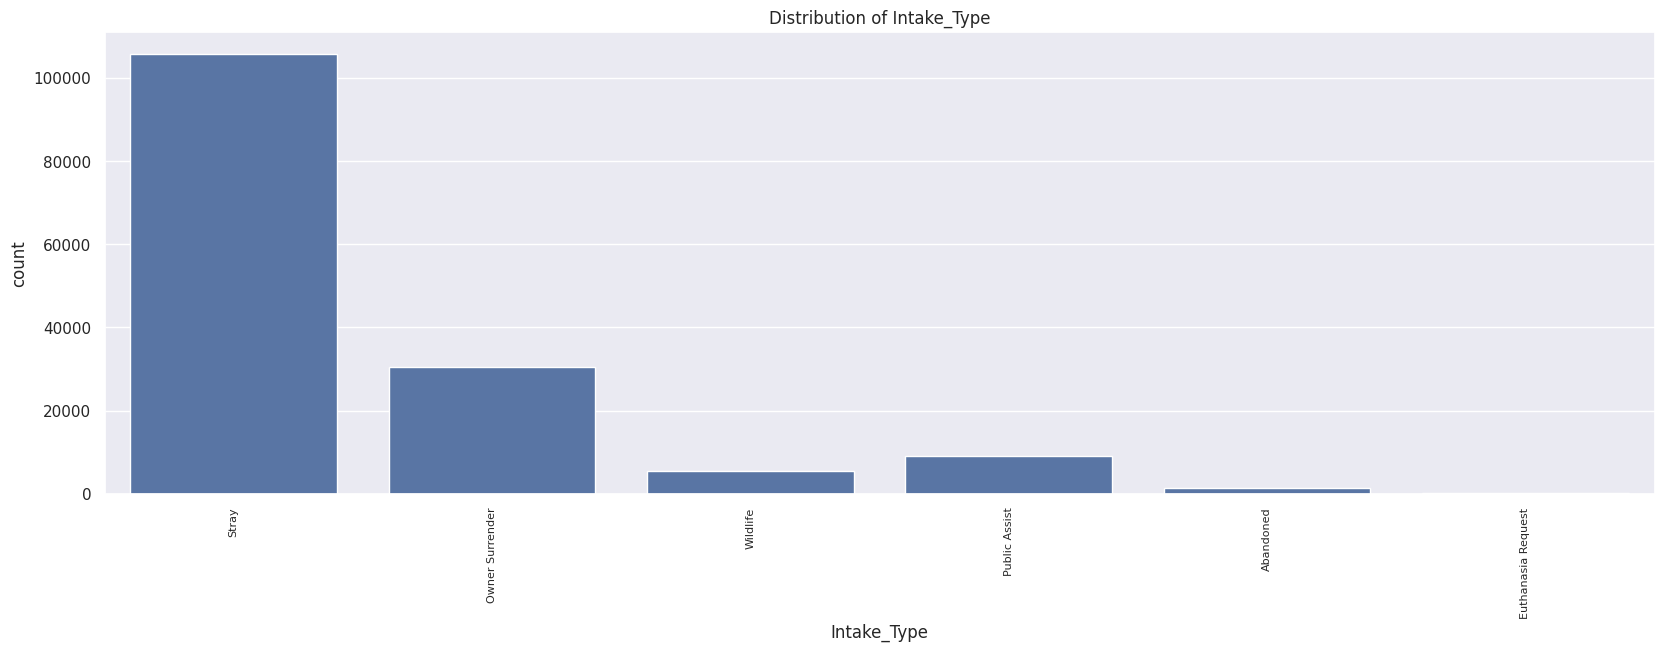

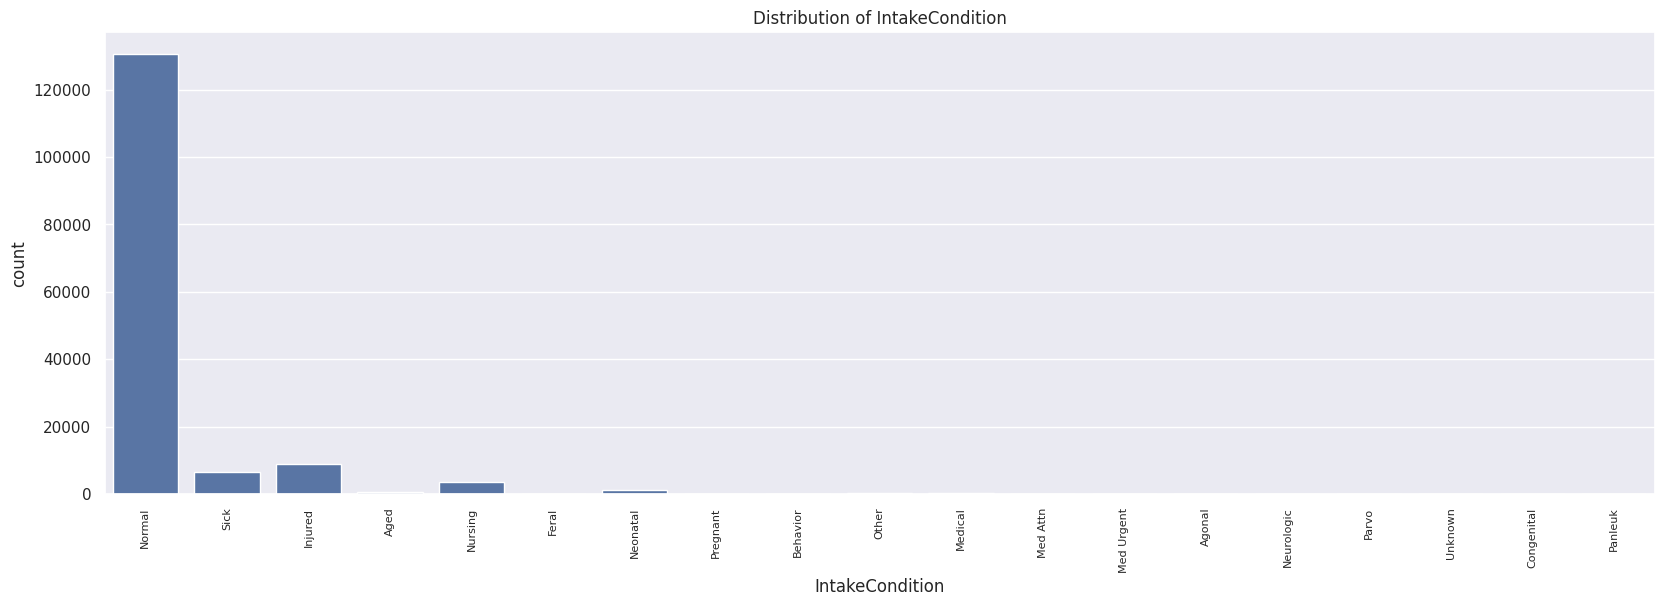

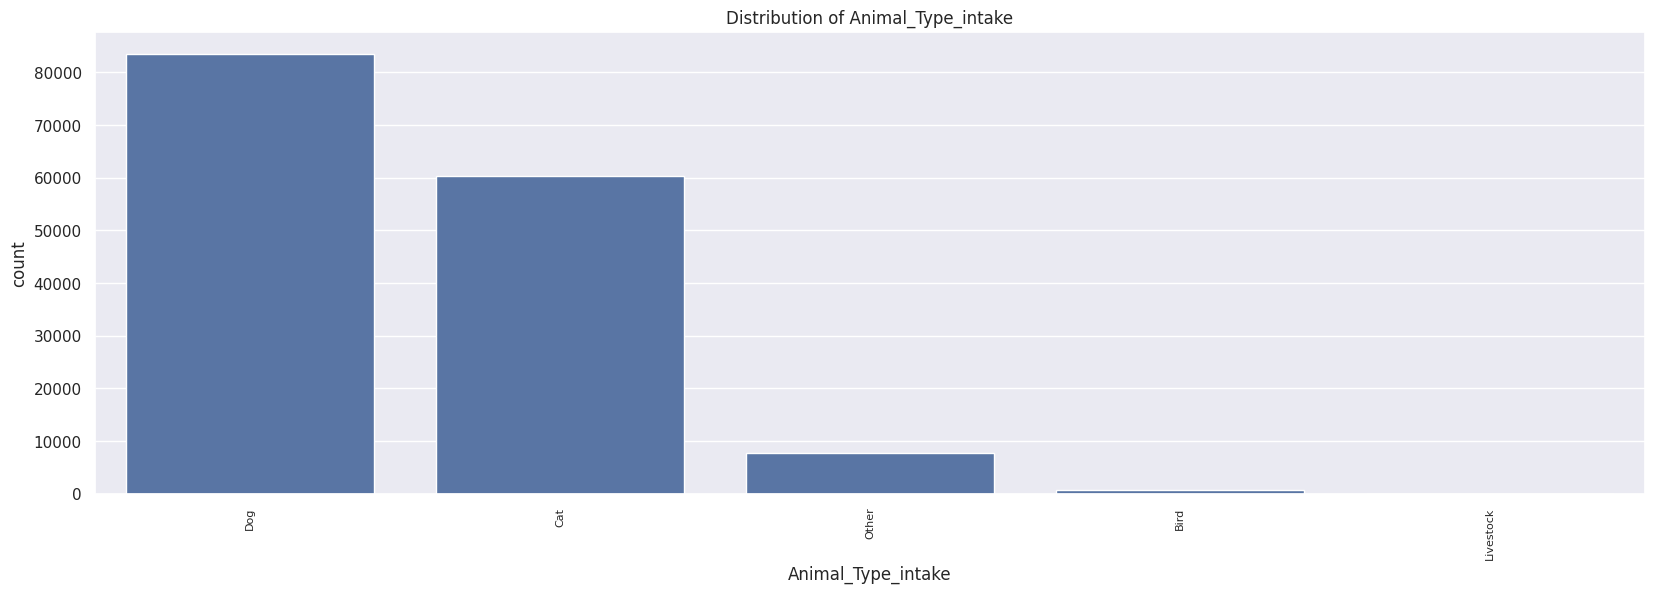

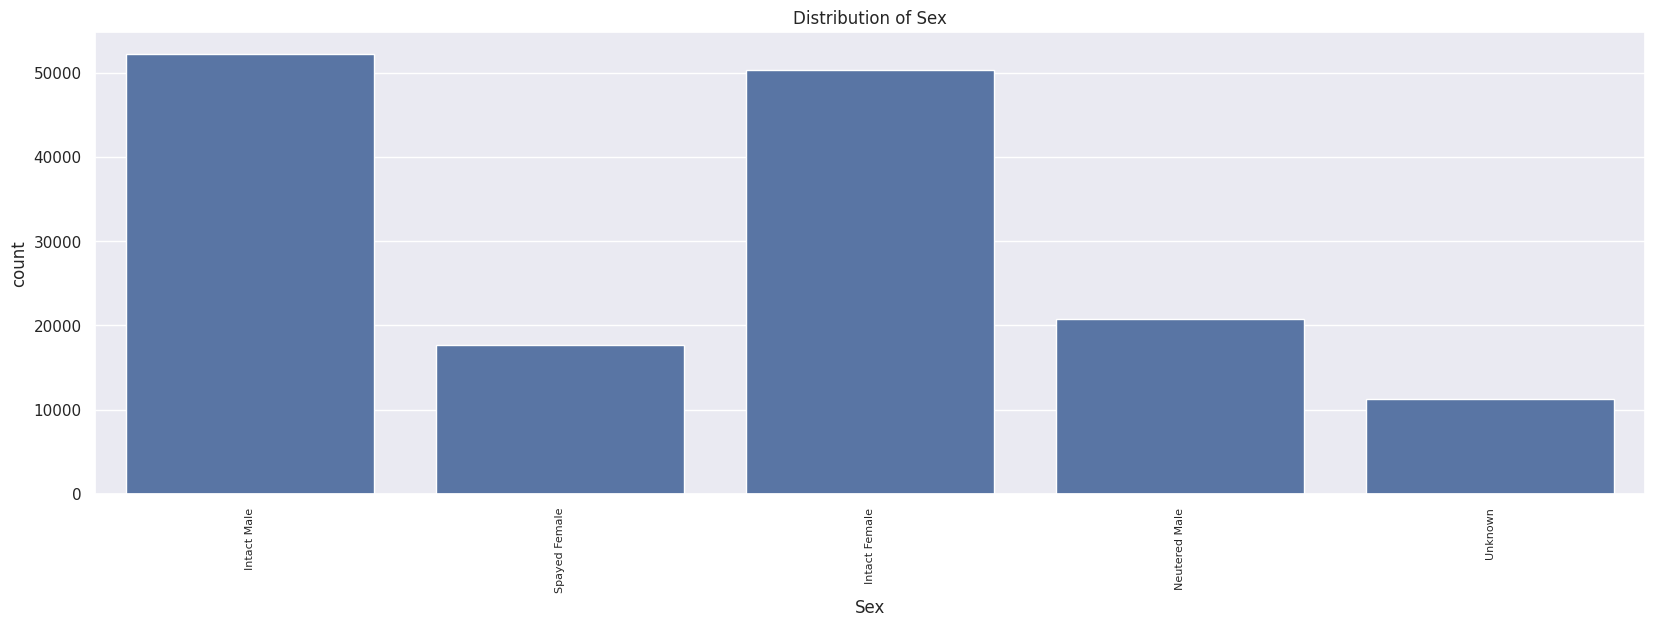

In [ ]:
categorical_vars = ['Intake_Type', 'IntakeCondition', 'Animal_Type_intake', 'Sex']
for var in categorical_vars:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

The visual data suggests that stray and normal conditioned animals account for the majority of shelter intakes, alonside intact sexes.

# **Distributions of numerical features**




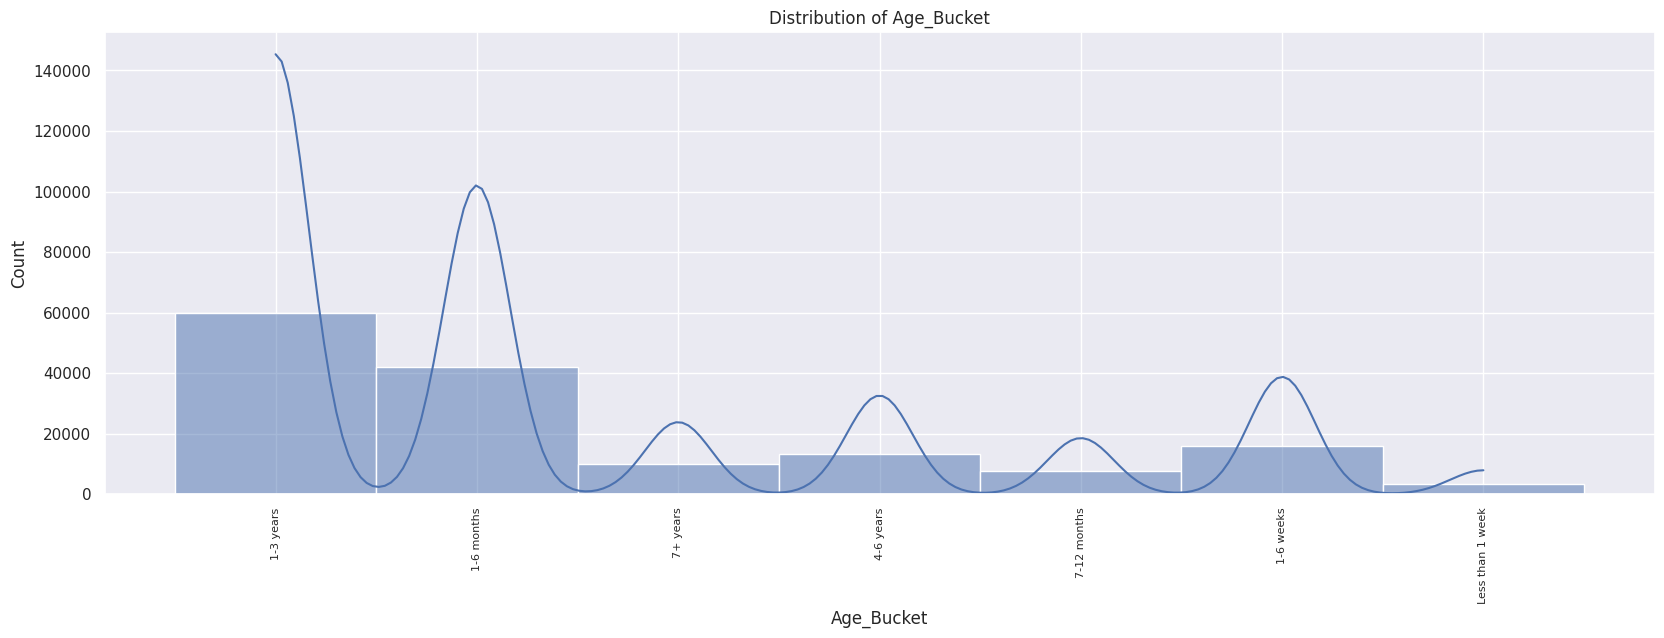

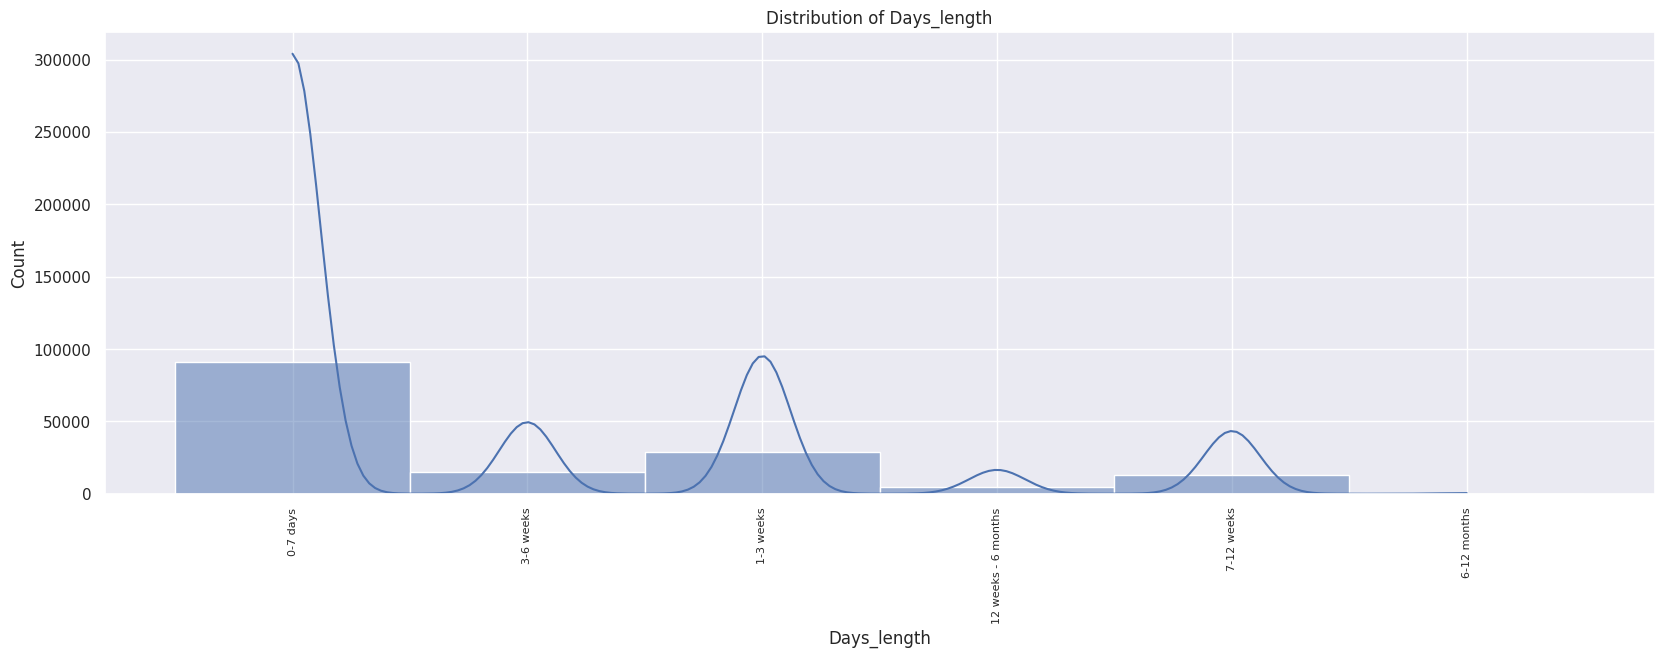

In [ ]:
numerical_vars = ['Age_Bucket', 'Days_length']
for var in numerical_vars:
  plt.figure(figsize=(20, 6))  # Increase the width of the figure
  sns.histplot(data[var], bins=30, kde=True)
  plt.title(f'Distribution of {var}')
  plt.xticks(rotation=90, fontsize=8)  # Rotate labels and decrease font size
  plt.show()

Both distributions indicate that the shelter has a high turnover rate, a big number of young animals, and a focus on reducing length of stay, which could indicate the efficacy of adoption drives or other outreach initiatives.

# **Boxplots for numerical features to check for outliers**

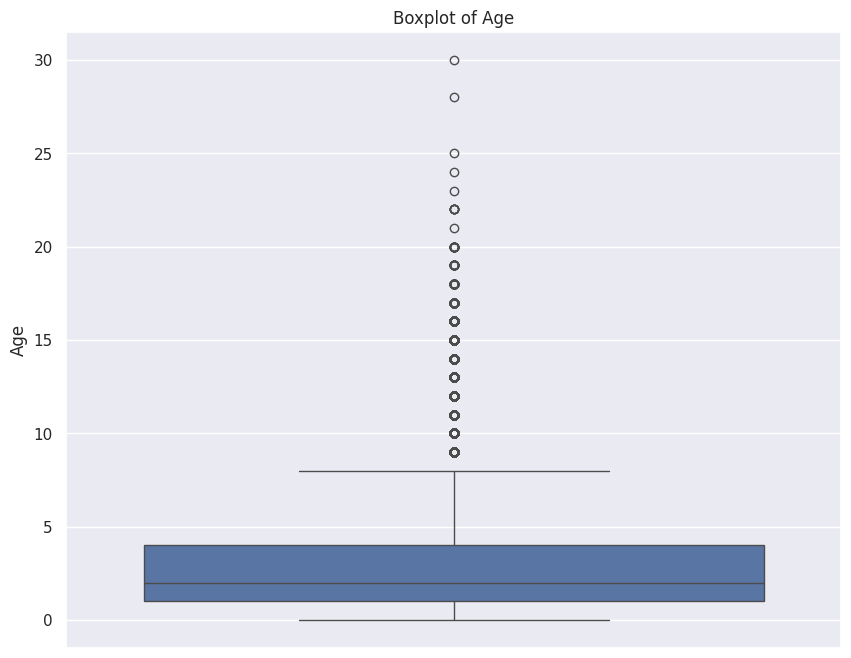

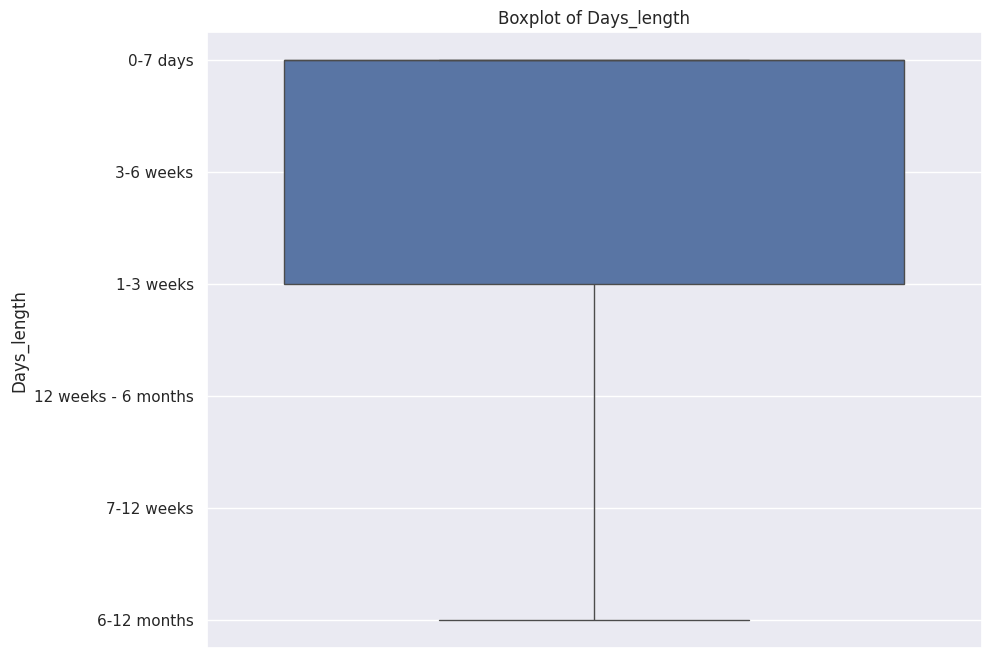

In [ ]:
numerical_vars = ['Age', 'Days_length']
for var in numerical_vars:
    plt.figure(figsize=(10, 8))
    if var == 'Age':
        data[var] = pd.to_numeric(data[var].astype(str).str.extract('(\d+)')[0], errors='coerce')
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

The 'Age' boxplot contains a substantial number of outliers above the upper whisker, which could imply that senior animals are less frequently adopted or more likely to be found or relinquished.

Based on the 'Days_length' boxplot, we can see that the majority of animals in the shelter are staying for "0-7 days". This shows that a substantial majority of animals have a brief stay, either owing to swift adoptions, return to owners, or other factors. Shelters may focus on tactics to maintain or improve quick turnover while also developing specific interventions for animals in longer stay categories to lower their stay time and increase their prospects of adoption.

# **Heatmap for checking correlation between numerical variables**

In [ ]:
data['DateTime_length'] = pd.to_timedelta(data['DateTime_length'])

# Extract just the days component of 'DateTime_length'
data['Days_length2'] = data['DateTime_length'].dt.days

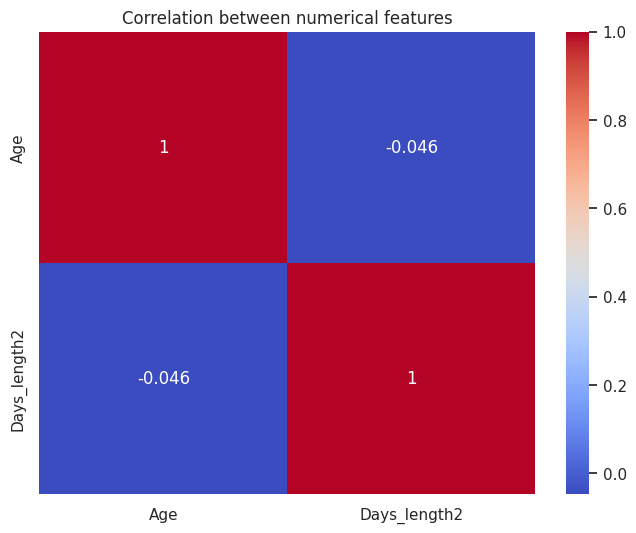

In [ ]:
numerical_vars = ['Age', 'Days_length2']
for col in numerical_vars:
    # Convert all values to strings, then replace non-numeric characters and convert back to numeric
    data[col] = pd.to_numeric(data[col].astype(str).str.replace('[^0-9.-]', ''), errors='coerce')

correlation_matrix = data[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

The correlation coefficient between 'Age' and 'Days_length2' is -0.046 indicating that there is no linear relationship among the variables. This implies that an animal's age is not a good predictor of its stay in the shelter. To have a better understanding, additional variables that may influence stay length should be investigated, as age is not a significant issue. Non-linear analytical methods may also be considered. This data can help shelter managers focus on other elements to improve adoption rates and policy decisions.

# **Pairwise relationships in the dataset**

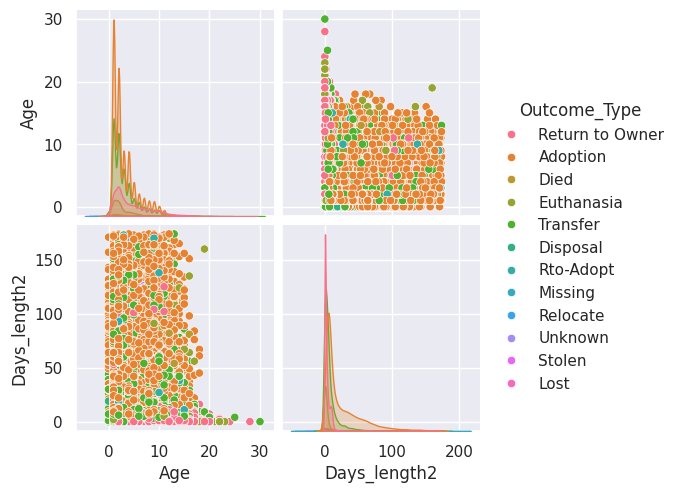

In [ ]:
# Pairwise plots can give us an immediate sense of the relationships between variables, and how these might differ by outcome type.
sns.pairplot(data[numerical_vars + ['Outcome_Type']], hue='Outcome_Type')
plt.show()

The pairwise plot highlights that younger animals had a broader range of outcomes, with adoption being among the most prevalent.

The length of stay in the shelter appears to vary greatly across different outcomes, with some outcomes, such as 'Euthanasia' and 'Died', occurring rather early in an animal's shelter stay.

# **Analyzing adoption rates over time**

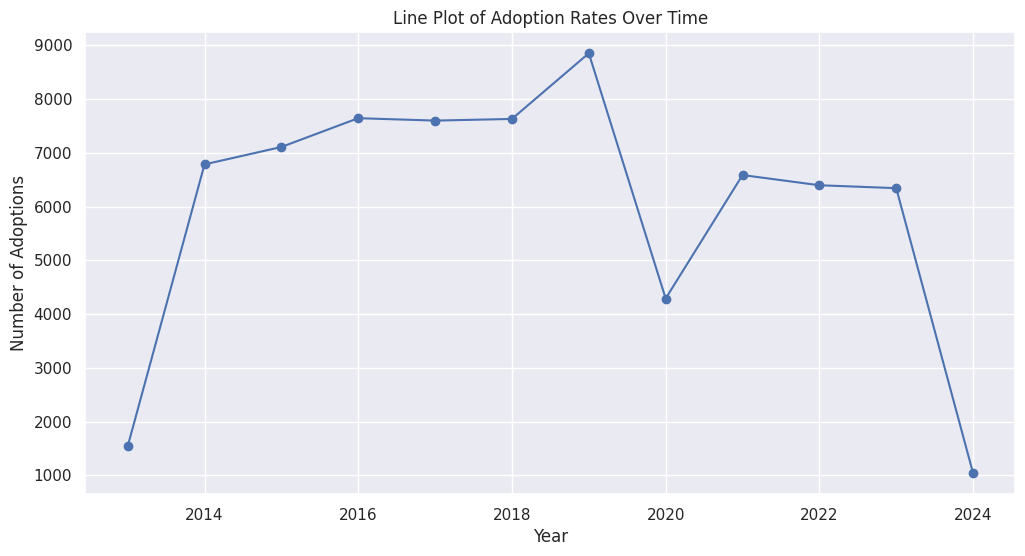

In [ ]:
# First, convert the 'DateTime_intake' column to datetime objects with the correct format
data['DateTime_intake'] = pd.to_datetime(data['DateTime_intake'], format='%Y-%m-%d %H:%M:%S')

# Then, extract the year from the 'DateTime_intake' column
data['Year'] = data['DateTime_intake'].dt.year

# Now, filter the dataframe for adoptions and group by year to get the adoption counts
adoption_rates_by_zyear = data[data['Outcome_Type'] == 'Adoption'].groupby('Year').sie()

# Continue with your plotting as before
plt.figure(figsize=(12, 6))
adoption_rates_by_year.plot(kind='line', marker='o')
plt.title('Line Plot of Adoption Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Adoptions')
plt.grid(True)
plt.show()

There appears to be a general upward trend in adoption rates from 2013 to 2019, suggesting an improvement in shelter outcomes or increased public interest in adoption.

The peak observed in 2019 could be the result of successful adoption campaigns or initiatives undertaken by the shelter or community engagement.

A notable decline in adoption rates is observed in the years following 2019, which may warrant an investigation into external factors such as economic downturns, policy changes, or societal shifts due to global events.

# **Age distribution by outcome type**

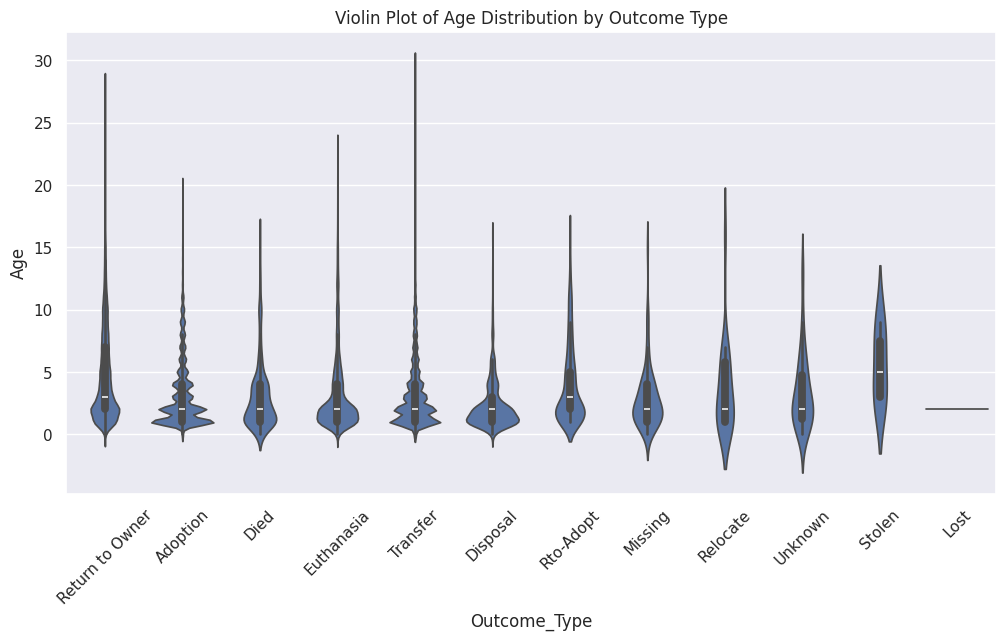

In [ ]:
#This can help us understand if age is a determining factor in the type of outcome an animal experiences.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outcome_Type', y='Age', data=data)
plt.title('Violin Plot of Age Distribution by Outcome Type')
plt.xticks(rotation=45)
plt.show()

The adoption outcome violinplot may indicate a higher concentration of younger animals, implying that they are more likely to be adopted.

# **Length of stay distribution at the shelter for adopted animals**

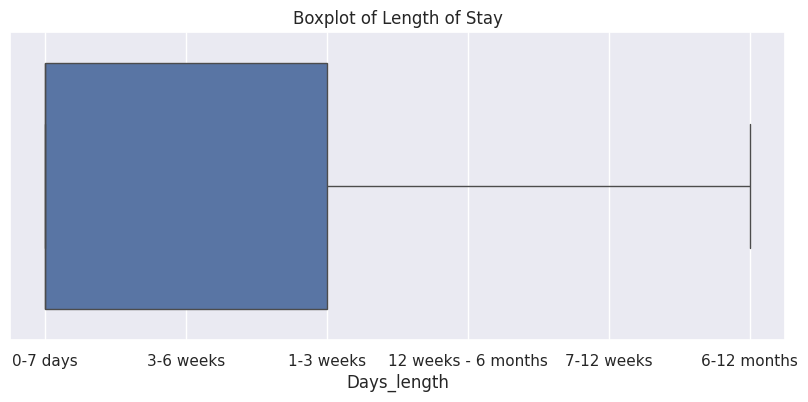

In [ ]:
# Checking for outliers and extreme values in 'LengthOfStay'
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Days_length'])
plt.title('Boxplot of Length of Stay')
plt.show()

The boxplot shows that animals spend varying amounts of time in the shelter, with some remaining substantially longer than others.

# **Relationship between Age and Length of Stay**

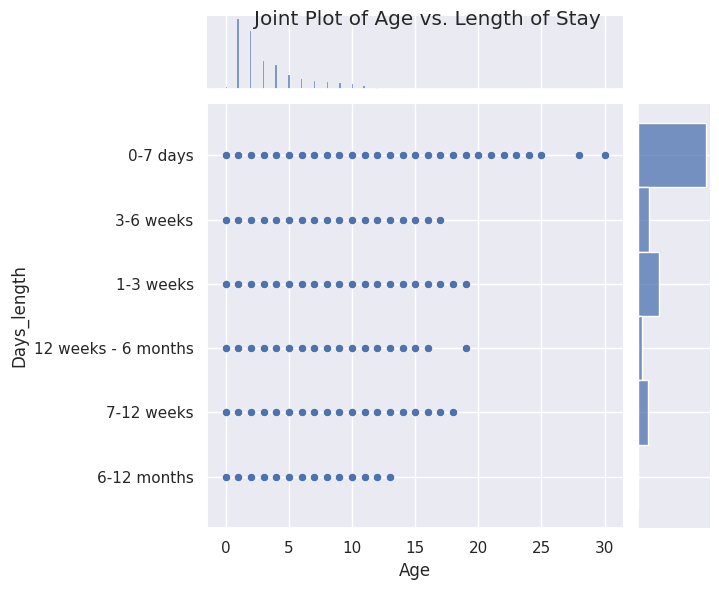

In [ ]:
sns.jointplot(x='Age', y='Days_length', data=data, kind='scatter')
plt.suptitle('Joint Plot of Age vs. Length of Stay', verticalalignment='top')
plt.show()

The joint plot shows a dense clustering of data points at lower age values, implying that young animals account for a sizable share of the shelter population.

# **Relationship between intake type and outcome type**

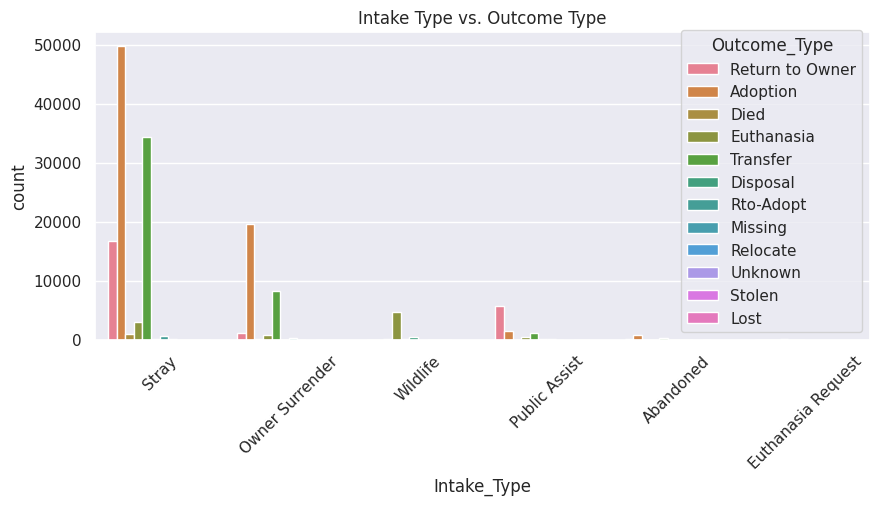

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Intake_Type', hue='Outcome_Type')
plt.title('Intake Type vs. Outcome Type')
plt.xticks(rotation=45)
plt.show()

This visualization suggests that most animals enter shelters as strays, with 'Adoption' and 'Return to Owner' being the most common outcomes, showing effective rehoming efforts by the shelters. However, while the number of 'Euthanasia', 'Died' and 'Disposal' outcomes is low, it highlights the persistent issues that shelters face. The low frequency of 'Wildlife' and 'Public Assist' intakes suggests that these are less prevalent scenarios for shelters. Overall, the evidence indicates good adoption and owner reunification procedures, with opportunities for improvement in decreasing negative outcomes through improved care and community actions.

# **Relationship between intake condition and outcome type**

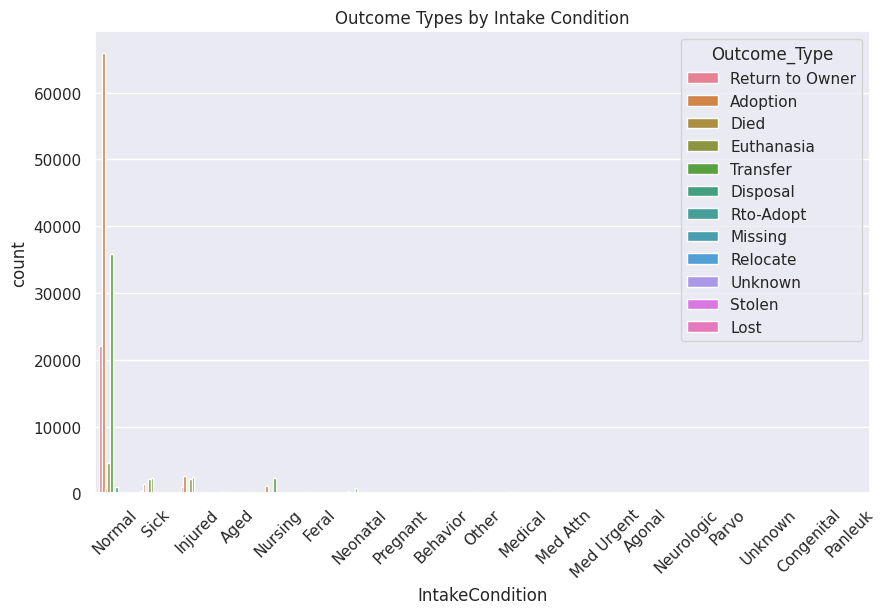

In [ ]:
#This plot could show if certain intake conditions are more likely to lead to adoption or other outcomes.
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='IntakeCondition', hue='Outcome_Type')
plt.title('Outcome Types by Intake Condition')
plt.xticks(rotation=45)
plt.show()

There is a considerable difference in the outcome profiles of animals based on their intake conditions, indicating that intake conditions are a major component in determining the fate of shelter animals.

The plot shows that animals with a 'Normal' intake condition are more likely to be adopted or returned to their owners than those with other intake conditions.

Animals identified with admission conditions such as 'Sick' or 'Injured' are more likely to be euthanized, which could suggest a lack of shelter resources for medical care or lower adoption rates for animals with health difficulties.

# **Relationship between length of stay at the shelter and intake condition and outcome type**

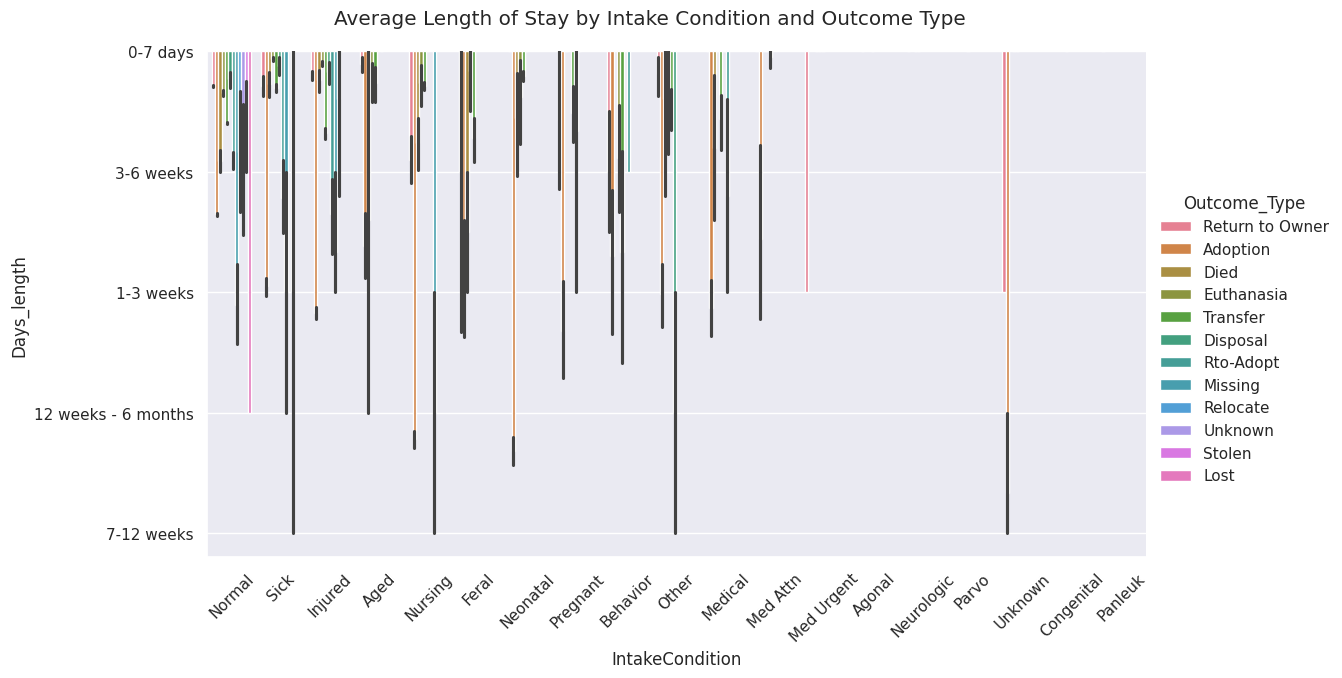

In [ ]:
g = sns.catplot(x='IntakeCondition', y='Days_length', hue='Outcome_Type', kind='bar', data=data, height=6, aspect=2)
g.fig.suptitle('Average Length of Stay by Intake Condition and Outcome Type', y=1.03)
g.set_xticklabels(rotation=45)
plt.show()

According to the data, an animal's condition at intake has a significant impact on how long they stay at the shelter. Animals requiring medical care frequently have longer stays, while those with uncertain conditions have the longest stays, emphasizing the importance of thorough early assessments. Adopted animals often have shorter stays, indicating effective shelter operations and public adoption desire. Furthermore, the speed with which pets are returned to their owners indicates that the shelter's lost-and-found operation is effective.

# Data-Driven Insights & Recommendations

Data Driven Insights:

The results show that shelter operations are efficient, allowing many animals to have brief stays, possibly as a result of successful adoptions and reunion. Younger animals are more likely to be adopted, but older animals have to spend more time in the shelter. Health difficulties at intake result in greater euthanasia rates, implying that medical care resources are limited. Adoption rates peaked in 2019, but have since fallen, which could be attributed to external factors. Animals in good health at the time of admission have a better chance of being adopted, but sick or damaged animals have a lower chance. The length of stay at the shelter varies significantly depending on the outcome, and age is not a good predictor of stay duration, indicating that other characteristics are more important in adoption chances. 

Recommendations: 

To improve shelter management and increase adoption rates, use focused marketing for animals with short stay potential, as well as special campaigns for senior pet adoptions. Create medical alliances to help sick and injured animals, lowering euthanasia rates. Implement behavioral training for long-stay animals to increase their prospects of adoption. Proactively study trends to anticipate and respond to changes in adoption rates. Redirect resources to provide better care for animals with difficult intake circumsances. Use policy advocacy and community involvement to gain support for adoption efforts. Finally, undertake detailed studies of external influences on adoption patterns in order to develop flexible and robust adoption methods.
